In [52]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

In [54]:
mnist = keras.datasets.mnist

In [55]:
(x_train,y_train),(x_test, y_test) = mnist.load_data()

In [56]:
x_train.shape

(60000, 28, 28)

5


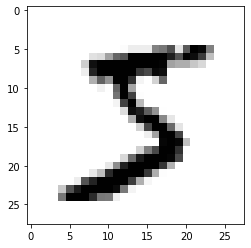

In [57]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
print(y_train[0])

In [58]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [74]:
# Doubt

x_test = tf.cast(x_test, tf.float32)
y_test = tf.cast(y_test, tf.float32)

# y_train = keras.utils.to_categorical(y_train)
# y_test = keras.utils.to_categorical(y_test)

In [60]:
model = Sequential()

In [61]:
model.add( Conv2D(32, (3,3) , input_shape = (28,28,1) ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [62]:
model.add( Conv2D(32, (3,3) ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [63]:
model.add( Conv2D(32, (3,3) ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [64]:
model.add( Flatten() )
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [65]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [66]:
model.fit(x_train_2,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 48s 798us/sample - loss: 0.2700 - accuracy: 0.9210
Epoch 2/5
60000/60000 [==============================] - 46s 770us/sample - loss: 0.1048 - accuracy: 0.9693
Epoch 3/5
60000/60000 [==============================] - 48s 805us/sample - loss: 0.0833 - accuracy: 0.9751
Epoch 4/5
60000/60000 [==============================] - 47s 786us/sample - loss: 0.0718 - accuracy: 0.9788
Epoch 5/5
60000/60000 [==============================] - 52s 869us/sample - loss: 0.0651 - accuracy: 0.9811


In [67]:
val_loss, val_acc = model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [68]:
print(val_loss)
print(val_acc)

0.07890316318364349
0.9781


In [75]:
pred = model.predict(x_test)   #why x_test is taking only float value

In [76]:
print(pred)

[[1.8882108e-08 5.2351161e-06 1.1895297e-05 ... 9.9995458e-01
  6.5098521e-10 1.6743330e-05]
 [1.8098441e-06 7.4875579e-06 9.9997246e-01 ... 1.8023833e-05
  2.1674323e-08 2.3009605e-09]
 [2.6337045e-15 1.0000000e+00 9.1888649e-12 ... 4.7572696e-10
  1.2697994e-08 8.9754528e-13]
 ...
 [2.4898505e-09 2.7707964e-10 5.5331145e-10 ... 1.4836933e-08
  6.5464370e-08 4.0356745e-06]
 [2.0439063e-07 4.8716538e-14 1.8465778e-12 ... 3.3381398e-11
  7.3410837e-07 3.9347426e-05]
 [5.8118376e-06 1.2196322e-05 5.3579441e-07 ... 2.5492984e-08
  6.1184246e-06 4.5588214e-07]]


In [77]:
print(np.argmax(pred[0]))

7


In [78]:
print(y_test[0])

tf.Tensor(7.0, shape=(), dtype=float32)


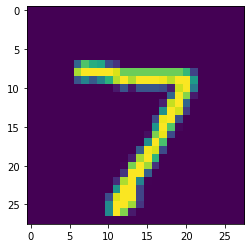

In [80]:
plt.imshow(np.squeeze(x_test[0]))
plt.show()

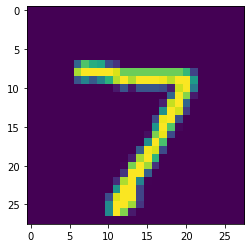

In [81]:
image = x_test[0]
image = np.array(image, dtype = 'float')
pixel = image.reshape((28,28))  #imshow is to print only 2D picture
plt.imshow(pixel, cmap = plt.cm.binary)
plt.show()